In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

data = pd.read_csv(r"C:\Users\chengyanyang\Desktop\IMM.csv")
print(data.shape)
#data.head()
print(data)

(408, 3)
          Date     WIP    MOVE
0    2021-7-10   65503   66135
1    2021-7-11   61182   67489
2    2021-7-12   63128   68118
3    2021-7-13   67223   68245
4    2021-7-14   67458   66189
..         ...     ...     ...
403  2022-8-17  121481  102109
404  2022-8-18  133957   97625
405  2022-8-19  138117   97806
406  2022-8-20   80041   80216
407  2022-8-21   88364   75287

[408 rows x 3 columns]


In [297]:
# 檢查各欄位有無空值
data.isnull().sum() 

Date    0
WIP     0
MOVE    0
dtype: int64

0       65503
1       61182
2       63128
3       67223
4       67458
        ...  
403    121481
404    133957
405    138117
406     80041
407     88364
Name: WIP, Length: 408, dtype: int64
0       66135
1       67489
2       68118
3       68245
4       66189
        ...  
403    102109
404     97625
405     97806
406     80216
407     75287
Name: MOVE, Length: 408, dtype: int64


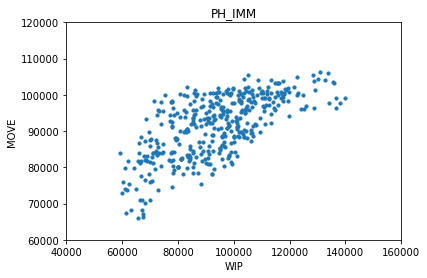

In [298]:
x = data['WIP']
y = data['MOVE']
print(x)
print(y)
# plot
plt.scatter(x,y,s=10)
plt.xlabel('WIP')
plt.ylabel('MOVE')
plt.title('PH_IMM')
plt.xlim(40000,160000)
plt.ylim(60000,120000)
plt.show()

Accuracy:  0.7789544926387901
Predict Values:  [89333.]


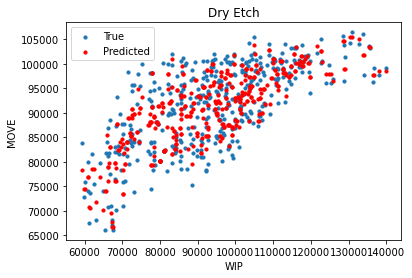

In [311]:
from sklearn.neighbors import KNeighborsRegressor

x = x.reshape(-1,1)
# 建立KNN模型
knnModel = KNeighborsRegressor(n_neighbors=2)
# 使用訓練資料訓練模型
knnModel.fit(x,y)
# 使用訓練資料預測
predicted= knnModel.predict(x)
print('Accuracy: ',knnModel.score(x,y))
print('Predict Values: ',knnModel.predict([[87798]]))


# plot
plt.scatter(x, y, s=10, label='True')
plt.scatter(x, predicted, color="r",s=10, label='Predicted')
plt.xlabel('WIP')
plt.ylabel('MOVE')
plt.title('Dry Etch')
plt.legend()
plt.show()

In [301]:
#摘分訓練集測試集
X=x_scaled
Y=y_scaled
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
print(Y_train.shape)

(306, 1)


Accuracy:  0.36454309198168255
 MSE:  0.03723324618314766


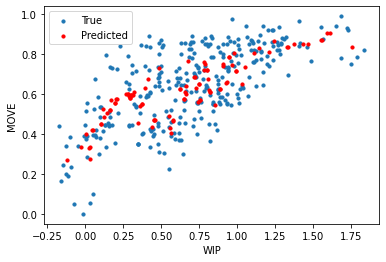

In [302]:
# 進行演算法流程
knn = KNeighborsRegressor(n_neighbors=5)
# 訓練資料
knn.fit(X_train, Y_train)
# 得出預測結果(測試集)
predicted= knn.predict(X_test)
print('Accuracy: ',knn.score(X_test, Y_test))
mse = metrics.mean_squared_error(Y_test, predicted)
print(' MSE: ', mse)
#print('Predict Values: ',knn.predict([[80000]]))
#print('predict',predicted)
# plot
plt.scatter(X_train, Y_train, s=10, label='True')
plt.scatter(X_test, predicted, color="r",s=10, label='Predicted')
plt.xlabel('WIP')
plt.ylabel('MOVE')
plt.legend()
plt.show()

In [295]:
print('Predict Values: ', predicted.shape )
print('Predict Values: ', X_test )

Predict Values:  (102, 1)
Predict Values:  [[ 3.45156246e-01]
 [ 1.96381146e-01]
 [ 6.58393110e-01]
 [ 1.33138077e+00]
 [ 9.91858820e-01]
 [ 1.20866738e+00]
 [ 9.23229666e-01]
 [ 9.74211323e-01]
 [ 8.55345131e-01]
 [ 8.20025317e-01]
 [ 2.76626374e-01]
 [ 3.69976917e-01]
 [ 8.15830624e-01]
 [ 1.43391496e+00]
 [ 1.29067487e-03]
 [ 3.10010176e-01]
 [ 2.07972399e-01]
 [ 4.35205639e-01]
 [ 1.75122242e+00]
 [ 2.92610886e-01]
 [ 8.18883566e-01]
 [ 7.99076671e-01]
 [ 7.37645511e-01]
 [ 8.08235499e-01]
 [ 7.55218546e-01]
 [ 1.58331058e-01]
 [ 7.99796471e-01]
 [ 1.37372484e+00]
 [ 1.16384125e-01]
 [ 2.78090794e-01]
 [ 9.92305592e-01]
 [ 7.44496016e-01]
 [ 6.52163121e-01]
 [ 1.92732508e-01]
 [ 7.44843506e-01]
 [ 6.49383206e-01]
 [ 9.32214748e-01]
 [ 5.74648167e-01]
 [ 6.24339150e-01]
 [ 9.62148477e-01]
 [ 6.45064410e-01]
 [ 5.64223485e-01]
 [ 5.54369679e-01]
 [ 8.82523766e-01]
 [ 9.89848346e-02]
 [-1.22936782e-01]
 [ 2.89706868e-01]
 [ 9.07964953e-01]
 [ 1.70096056e-01]
 [ 4.48881829e-01]
 [ 3.69

In [285]:
#標準化資料
from sklearn.preprocessing import MinMaxScaler

y = y.values.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0, 1)).fit(x)
scaler = MinMaxScaler(feature_range=(0, 1)).fit(y)
x_scaled = scaler.transform(x)
y_scaled = scaler.transform(y)
print('資料集 X 的平均值 : ', x.mean(axis=0))
print('資料集 X 的標準差 : ', x.std(axis=0))
print('標準化後資料集 X 的平均值 : ', x_scaled.mean(axis=0))
print('標準化後後資料集 X 的標準差 : ', x_scaled.std(axis=0))
print('==========================================================')
print('資料集 Y 的平均值 : ', y.mean(axis=0))
print('資料集 Y 的標準差 : ', y.std(axis=0))
print('標準化後資料集 Y 的平均值 : ', y_scaled.mean(axis=0))
print('標準化後後資料集 Y 的標準差 : ', y_scaled.std(axis=0))
print(x_scaled.shape)


資料集 X 的平均值 :  [93522.21568627]
資料集 X 的標準差 :  [16944.35439303]
標準化後資料集 X 的平均值 :  [0.67976906]
標準化後後資料集 X 的標準差 :  [0.42057024]
資料集 Y 的平均值 :  [91268.30882353]
資料集 Y 的標準差 :  [8453.3794923]
標準化後資料集 Y 的平均值 :  [0.62382558]
標準化後後資料集 Y 的標準差 :  [0.20981855]
(408, 1)


Accuracy:  0.704639637365989
 MSE:  0.013002892387577165
Predict Values:  [[0.80889738]]


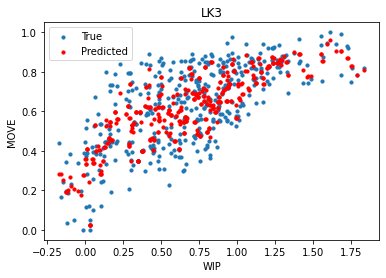

In [288]:
from sklearn.neighbors import KNeighborsRegressor

x_scaled = x_scaled.reshape(-1,1)
# 建立KNN模型
knnModel = KNeighborsRegressor(n_neighbors=3)
# 使用訓練資料訓練模型
knnModel.fit(x_scaled,y_scaled)
# 使用訓練資料預測
predicted= knnModel.predict(x_scaled)
print('Accuracy: ',knnModel.score(x_scaled,y_scaled))
mse = metrics.mean_squared_error(y_scaled, predicted)
print(' MSE: ', mse)
print('Predict Values: ',knnModel.predict([[80000]]))
# plot
plt.scatter(x_scaled, y_scaled, s=10, label='True')
plt.scatter(x_scaled, predicted, color="r",s=10, label='Predicted')
plt.xlabel('WIP')
plt.ylabel('MOVE')
plt.title('LK3')
plt.legend()
plt.show()

In [240]:
#摘分訓練集測試集
X=x_scaled
Y=y_scaled
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
print(Y_train.shape)

(306, 1)


In [248]:
# 進行演算法流程
knn = KNeighborsRegressor(n_neighbors=5)
# 訓練資料
knn.fit(X_train, Y_train)
# 得出預測結果(測試集)
predicted= knn.predict(X_test)
print('Accuracy: ',knn.score(X_test, Y_test))
mse = metrics.mean_squared_error(Y_test, predicted)
print('訓練集 MSE: ', mse)
print('Predict Values: ',knn.predict([[80000]]))
#print('predict',predicted)

Accuracy:  0.3323471920888046
訓練集 MSE:  0.04469698252888955
Predict Values:  [[0.82448328]]


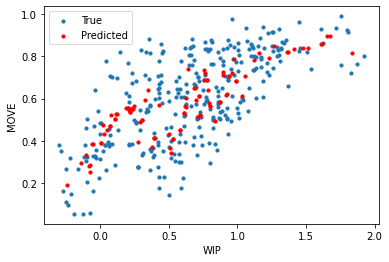

In [249]:
# plot
plt.scatter(X_train, Y_train, s=10, label='True')
plt.scatter(X_test, predicted, color="r",s=10, label='Predicted')
plt.xlabel('WIP')
plt.ylabel('MOVE')
plt.legend()
plt.show()